In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [195]:
def elbo(mew, sig, phi, X):
    log_var = np.log(2 * np.pi * sig)
    neg_kl_mu = 0.5 * np.sum(log_var) - k/2 * np.log(2*np.pi * s**2)
    
    phi_entropy = -np.multiply(phi, np.log(phi))
    neg_kl_phi = -n * np.log(k) + np.sum(phi_entropy)
    
    mu_x = X @ mew.T
    mu_sq = 0.5 * (np.multiply(mew, mew) + np.multiply(sig, sig))
    conditional = np.sum(np.multiply(phi, mu_x - mu_sq.T))
    
    return conditional + neg_kl_phi + neg_kl_mu

In [196]:
NUM_IT = 200

In [197]:
n = len(X)
k = 5
s = 1 # sigma
mew = np.random.normal(size=(k,1))
sig = np.random.normal(size=(k,1))
c = np.sign(np.random.normal(size=(n,1)))
phi = np.random.normal(size=(n,k))
phi = phi/np.sum(phi, axis=1)[:, None]




In [211]:
X = np.array([])
mew_s = 12
true_centers = np.random.normal(scale=mew_s, size=(k, 1))
for i in range(k):
    num_pt = int(150 * np.random.rand(1))
    cluster_pt = np.random.normal(true_centers[i], s, num_pt)
    X = np.append(X, cluster_pt)

X = np.array([X]).T
X.shape 

(406, 1)

(array([ 1.,  2.,  9., 15., 20., 22., 21.,  7.,  5.,  1.,  1.,  0.,  1.,
         0.,  3.,  9., 25., 19., 24., 17., 10.,  8.,  8.,  6., 17., 28.,
        36., 26., 12., 11.,  2.,  1.,  1.,  3.,  9.,  6., 10.,  8.,  1.,
         1.]),
 array([-7.87577322, -7.35884036, -6.84190751, -6.32497465, -5.80804179,
        -5.29110894, -4.77417608, -4.25724322, -3.74031037, -3.22337751,
        -2.70644465, -2.1895118 , -1.67257894, -1.15564608, -0.63871323,
        -0.12178037,  0.39515249,  0.91208534,  1.4290182 ,  1.94595106,
         2.46288391,  2.97981677,  3.49674963,  4.01368248,  4.53061534,
         5.0475482 ,  5.56448105,  6.08141391,  6.59834677,  7.11527962,
         7.63221248,  8.14914534,  8.66607819,  9.18301105,  9.69994391,
        10.21687676, 10.73380962, 11.25074248, 11.76767533, 12.28460819,
        12.80154105]),
 <BarContainer object of 40 artists>)

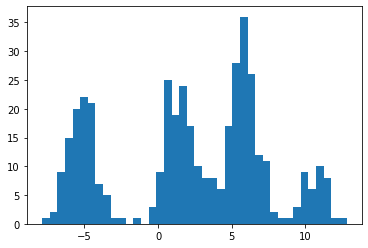

In [212]:
plt.hist(X,bins=40)

In [213]:
for l in range(NUM_IT):
    mu_x = X @ mew.T
    mu_sq = 0.5 * (np.multiply(mew, mew) + np.multiply(sig, sig))
    phi = np.exp(mu_x - mu_sq.T)
    phi = phi/np.sum(phi, axis=1)[:, None]
    
    for j in range(k):
        denom = 1/(s**2) + np.sum(phi[:, j])
        mew[j] = (phi[:, j] @ X)/denom
        sig[j] = 1/denom
    print(elbo(mew, sig, phi, X))
    

        
            

2954.2728116399176
5085.983077991005
5096.716253656286
5103.842071501374
5112.670336788877
5122.7779809406675
5132.392716814895
5139.481409264549
5143.353578000911
5144.840510638128
5145.1872849845995
5145.170690978311
5145.0922710644245
5145.03013018677
5144.991846035009
5144.970387206242
5144.958862513766
5144.952799998948
5144.94964371412
5144.948009097108
5144.947164813084
5144.946729339059
5144.946504884671
5144.94638923737
5144.946329662779
5144.946298976606
5144.946283171697
5144.946275032774
5144.946270845138
5144.946268701126
5144.94626763516
5144.946267200678
5144.94626731957
5144.946268406047
5144.946272033369
5144.94628308224
5144.946316254203
5144.946415637351
5144.946713465722
5144.947606974518
5144.950292928067
5144.958394498556
5144.9829683765065
5145.058173107895
5145.291328862475
5146.0249835423765
5148.339526050252
5155.237068181196
5172.198616572665
5204.351323490506
5255.080375952469
5314.671928628827
5366.127834327513
5403.376012409146
5423.545917534071
5430.58925

In [214]:
np.argmax(phi,axis=1)

array([3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,

In [217]:
sorted(mew)

[array([-5.12893808]),
 array([1.51935971]),
 array([1.51935971]),
 array([5.72600884]),
 array([10.24045335])]

In [218]:
sorted(true_centers)

[array([-5.168861]),
 array([1.52081297]),
 array([5.61142849]),
 array([6.82733444]),
 array([10.71809314])]